## Observations and Insights 

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata=pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Matplotlib-Storytelling\Resources\Mouse_metadata.csv")
study_results=pd.read_csv(r"C:\Users\akibo\Desktop\Columbia Bootcamp\Matplotlib-Storytelling\Resources\Study_results.csv")

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID",how='outer',)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [218]:
# Checking the number of mice in the DataFrame.
mice_count=combined_data['Mouse ID'].nunique()
# mice_count



AttributeError: 'int' object has no attribute 'loc'

In [220]:
# Clean DataFrame by dropping any rows that have the same Mouse ID and Timepoint.
combined_data_cleaned=combined_data.drop_duplicates(['Mouse ID','Timepoint'])
combined_data_cleaned.loc[combined_data_cleaned['Drug Regimen']=='Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [94]:
# Summary statistics table for tumor volume of each regimen generated by passing in columns
summary_stats['Mean T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_stats['Median T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_stats['Variance T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_stats['Std Deviation T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_stats['SEM T.V']=combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Average TV,Median TV,Std Deviation TV,Median Tumor Volume,Mean T.V,Median T.V,Variance T.V,Std Deviation T.V,SEM T.V
Drug Regimen,,,,,,,,,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,40.675741,41.557809,41.557809,4.994774,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,52.591172,51.776157,51.776157,6.268188,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,52.884795,51.820584,51.820584,6.567243,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,55.235638,53.698743,53.698743,8.279709,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,54.331565,52.509285,52.509285,8.134708,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989,54.033581,52.288934,52.288934,7.821003,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,10.894410,27.043478,16.863354,52.322552,0.975155,52.322552,50.854632,50.854632,6.507770,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246,40.216745,40.673236,40.673236,4.846308,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928,54.233149,52.431737,52.431737,7.710419,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(14.384461805555553, 0.5, 'Count')

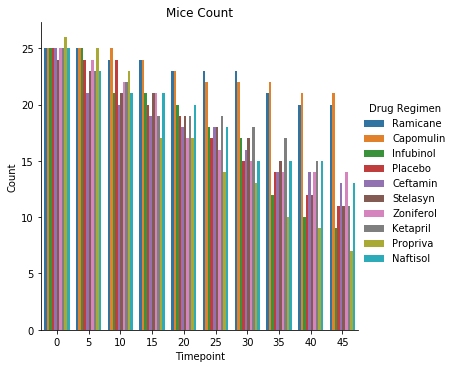

In [122]:
# Generate a graph of the mice for each timepoint based on drug regimen
sns.catplot(x="Timepoint",kind="count",hue="Drug Regimen",data=combined_data)
plt.title("Mice Count")
plt.ylabel("Count")
# CHECK CHEK CHEK CHEK CHECK

## Pie Plots

Text(0.5, 1.0, 'Gender Count')

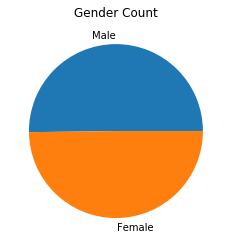

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# combined_data.groupby('Mouse ID').nunique()
Gender_lables= ["Male","Female"]


Gender_counts_table=combined_data_cleaned.drop_duplicates('Mouse ID')['Sex'].value_counts()
Gender_counts_table.plot(kind='pie')
plt.ylabel("")
plt.title("Gender Count")

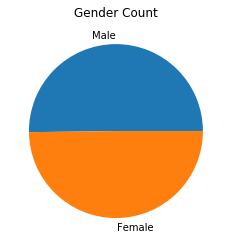

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender_counts_table.values,labels=Gender_counts_table.index.values)
plt.title("Gender Count")
plt.show()

## Quartiles, Outliers and Boxplots

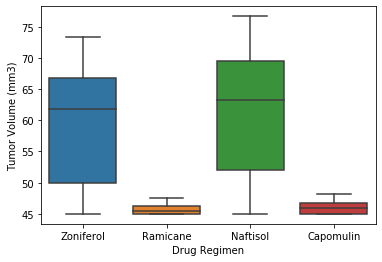

In [209]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined_data_drugs=combined_data_cleaned.groupby('Mouse ID').max()
combined_data_drugs_top=combined_data_drugs.loc[combined_data_drugs['Drug Regimen'].isin(['Ramicane','Capomulin','Zoniferol','Naftisol'])]

sns.boxplot(x=combined_data_drugs_top['Drug Regimen'],y=combined_data_drugs_top['Tumor Volume (mm3)'],)

# q75,q25=np.percentile()

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

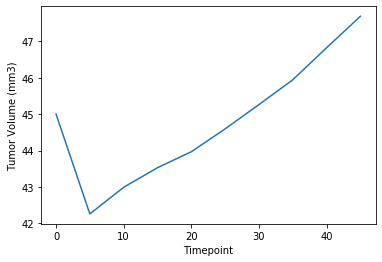

In [226]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
i557_mouse=combined_data_cleaned.loc[combined_data_cleaned['Mouse ID']=='i557']
i557_mouse
sns.lineplot(i557_mouse['Timepoint'],i557_mouse['Tumor Volume (mm3)']


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen




## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
